# Исследование объявлений о продаже квартир

Введение
    
Цель работы - определять рыночную стоимость объектов недвижимости для построения автоматизированной системы отслеживания аномалий и мошеннической деятельности.

 Данные представляют собой архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.
 
План работы: 
1. проверка данных (исследование пропусков, дублей, проверка типов данных) 
2. анализ (построение гистограмм, графиков, подсчет описательных статистик)
3. исследование длительности продажи квартир
4. исследование факторов, влияющих на стоимость квартир
5. исследование зависимости цены квартиры от расстояния от центра города.

1.1 Загружаем файл с данными из csv-файла

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import seaborn as sns

In [4]:
#считываем данные из файла, в параметрах функции read_csv указаны разделители \t
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
display(data.head(10))  

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


1.2 Изучим общую информацию о датафрейме

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сначала посмотрим, есть ли в наборе явные дубликаты.

In [6]:
data.duplicated().sum()

0

Явных дубликатов не оказалось. Неявные подобно изучим в следующем разделе.

### Предобработка данных

2.1 Выведем количество пропусков в каждом столбце:

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выведем количество пропусков в каждом столбце в процентах от общего числа записей.

In [8]:
data.isna().mean()*100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропуски встречаются в столбцах: высота потолков (м), всего этажей в доме, жилая площадь (м²), площадь кухни  (м²),число балконов, название населённого пункта, расстояние до ближайшего аэропорта (м), расстояние до центра города (м), число парков в радиусе 3 км,  расстояние до ближайшего парка (м), число водоёмов в радиусе 3 км, расстояние до ближайшего водоёма (м), сколько дней было размещено объявление, а так же является ли квартира апартаментами. 

Из этих столбцов мы не можем заполнить пропуски в названии населенного пункта и количестве этажей в доме (точного адреса нет).
Число таких пропусков невелико: 0,2% и 0,4% от числа всех записей, поэтому мы можем удалить их без ущерба для исходных данных. 

In [9]:
#удаляем строки с пропусками в стобцах floors_total и locality_name
data=data.dropna(subset=['floors_total','locality_name'])

Пропусков в столбцах с жилой площадью и площадью кухни довольно много: 8% и 10% соответственно. Их лучше заполнить средним или медианой, в зависимости от наличия сильно отклоняющихся значений в данных. Посмотрим, какие в принципе принимают значения жилая площадь и площадь кухни.

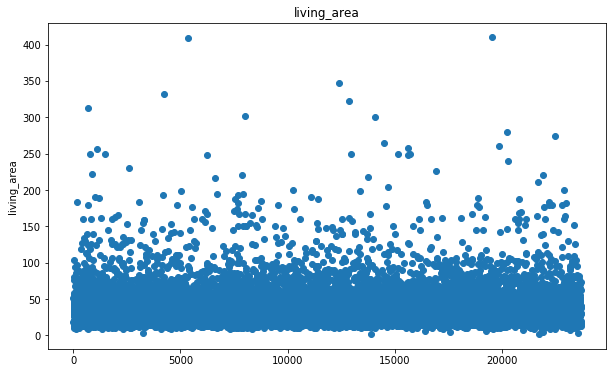

In [10]:
#строим график значений жилой площади
data['living_area'].plot(style='o',figsize=(10,6))

plt.title('living_area') 
plt.ylabel('living_area') 
  
plt.show() 

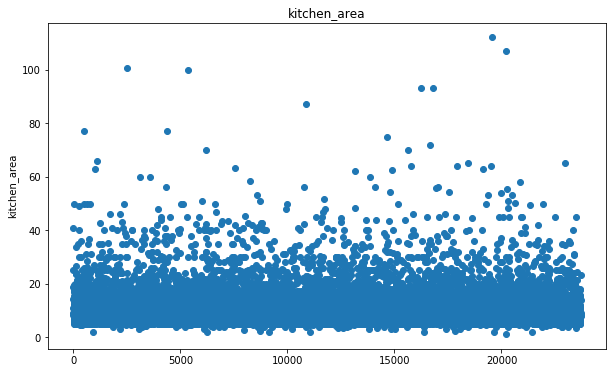

In [11]:
#строим график значений площади кухни
data['kitchen_area'].plot(style='o',figsize=(10,6))

plt.title('kitchen_area') 
plt.ylabel('kitchen_area') 
  
plt.show() 

Из графиков видно, что в обоих случаях есть сильно отклоняющиеся значения, которые могут влиять на среднее, поэтому лучше заменить пропуски в этих столбцах медианой, взятой по группе с тем же количеством комнат.

Выведем медианное значение жилой площади и площади кухни для квартир с разным числом комнат.

In [12]:
#считаем медианное значение жилой площади для разного числа комнат
data_tmp=data.pivot_table(index=['rooms'],values='living_area',aggfunc=['count','median'])
display(data_tmp)

,count,median
,living_area,living_area
rooms,,
0,183,18.000
1,7358,17.600
2,7265,30.500
3,5339,45.000
4,1082,63.650
5,292,91.785
6,98,124.400
7,53,145.000


Квартиры с 0 комнат - это по всей видимости студии, которые мы можем причислить к однокомнатным квартирам. Для квартир с большим числом комнат (от 10)  данные по жилой площади выглядят сомнительно: площадь не возрастает с числом комнат, но поскольку таких квартир всего 11  (либо это ошибка в заполнении), можно удалить строки с числом комнат больше 10, а в остальных заменить пропуски жилой площади на медианные в зависимости от числа комнат.

In [13]:
#удаляем строки с числом комнат больше или равно 10
data=data[data['rooms']<10]

In [14]:
#заменяем пропуски жилой площади на медианные в зависимости от числа комнат
for t in data['rooms'].unique():
    data.loc[(data['rooms']==t)&(data['living_area'].isna()),'living_area']=\
    data.loc[(data['rooms']==t),'living_area'].median()

Для площади кухни выведем медианные значения в зависимости от числа комнат.

In [15]:
#считаем медианное значение площади кухни
data_tmp=data.pivot_table(index=['rooms'],values='kitchen_area',aggfunc=['count','median'])
print(data_tmp)

             count       median
      kitchen_area kitchen_area
rooms                          
0                0          NaN
1             7195         9.00
2             7257         8.70
3             5356         9.50
4             1075        11.00
5              285        15.10
6               96        19.75
7               52        20.00
8                9        25.00
9                7        14.30


Для квартир с 0 комнат площадь кухни не указана, по всей видимости, если это действительно студии, площадь кухни оценить невозможно, у нее нет границ. Эти пропуски оставляем. Для 9-комнатных квартир площадь кухни подозрительно маленькая, скорее всего ошибка заполнения, 7 строк можно удалить без ущерба для исходных данных. Для остальных квартир заменим пропуски медианой.

In [16]:
#удаляем строки с числом комнат равно 9
data=data[data['rooms']<9]

In [17]:
#заменяем пропуски площади кухни на медианные в зависимости от числа комнат
for t in data['rooms'].unique():
    data.loc[(data['rooms']==t)&(t>0)&(data['kitchen_area'].isna()),'kitchen_area']=\
    data.loc[(data['rooms']==t)&(t>0),'kitchen_area'].median()

Посмотрим теперь, нет ли данных, в которых общая площадь оказалась меньше суммы жилой площади и кухни.

In [18]:
#находим число строк, в которых total_area меньше суммы kitchen_area и living_area
display(data['total_area'][data['living_area']+data['kitchen_area']>data['total_area']].count())

282

282 - это порядка 1,2% от всех записей. Поскольку эти данные явно ошибочные, а их число невелико, лучше их удалить.

In [19]:
#удаляем строки, в которых living_area + kitchen_area > total_area
data=data[data['living_area']+data['kitchen_area']<=data['total_area']]

In [20]:
#проверяем еще раз, чтобы везде общая площадь была больше суммы жилой и кухни
display(data['total_area'][data['living_area']+data['kitchen_area']>data['total_area']].count())

0

В столбце с высотой потолков пропусков около 40%, поэтому удалять строки с такими пропусками нельзя.

Посмотрим, какие значения принимает высота потолков (исключая явно ошибочные значения меньше 2 м и больше 5 м).

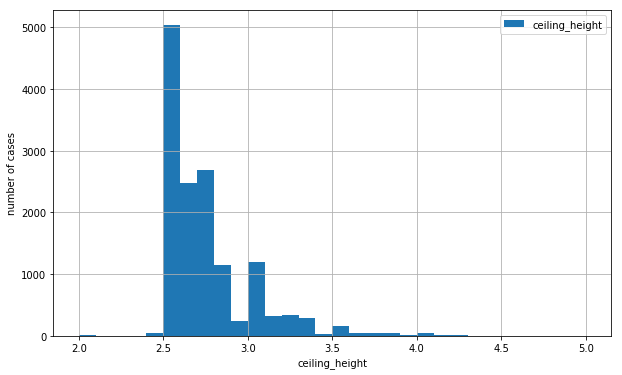

In [21]:
#строим гистограмму значений ceiling_height
data['ceiling_height'].hist(bins=30,range=(2,5),figsize=(10,6),legend=True)

plt.xlabel('ceiling_height') 
plt.ylabel('number of cases') 
  
plt.show() 

Из гистограммы видно, что в основном полоки имеют высоту от 2,5 до 3 м.
Среднее значение высоты потолков 2.77 м. Предлагается пропуски в этом столбце заменить этим значением.

In [22]:
#считаем среднюю высоту потолков
display(data['ceiling_height'].mean())

2.765933904013418

Заменяем пропуски в столбце с высотой потолков на среднее значение.

In [23]:
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].mean())

Пропуски в столбце с числом балконов предлагаем заменить нулем, считая что если не указано число балконов, значит их нет.

In [24]:
#заменяем пропуски в столбце с числом балконов нулем
data['balcony']=data['balcony'].fillna(0)

Пропуски в столбце "апартаменты" оставляем нетронутыми, этот столбец в анализе не участвует.
Число дней от публикации до снятия объявления также нечем заменить, эти пропуски тоже не трогаем.

Очень много пропусков в столбцах, связанных с расстоянием до центра, аэропорта, парков и прудов. В частности расстояние до центра и аэропорта не указано в 23% строк, до ближайшего парка в 66% строк, до ближайшего пруда в 61% строк. Эти значения без точного адреса квартиры указать невозможно.  

Можно попробовать для пригородов Санкт-Петербурга заменить расстояние до аэропорта на среднее по расстоянию в одном городе/ поселке.

In [25]:
#заменяем пропуски расстояния до аэропорта средним значением по расстоянию от заданного пригорода до аэропорта
for t in data['locality_name'].unique():
    if (t!='Санкт-Петербург'):
        data.loc[(data['locality_name']==t)&(data['airports_nearest'].isna()),'airports_nearest']=\
        data.loc[(data['locality_name']==t),'airports_nearest'].mean()
    

In [26]:
for t in data['locality_name'].unique():
    if (t!='Санкт-Петербург'):
        data.loc[(data['locality_name']==t)&(data['cityCenters_nearest'].isna()),'cityCenters_nearest']=\
        data.loc[(data['locality_name']==t),'cityCenters_nearest'].mean()
    

Проверим теперь число пропусков.

In [27]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20366
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5323
cityCenters_nearest      5299
parks_around3000         5305
parks_nearest           15141
ponds_around3000         5305
ponds_nearest           14202
days_exposition          3130
dtype: int64

Пропусков в столбце с расстоянием до аэропорта стало 5516, а было 5542, с расстоянием до центра было 5519, стало 5492 пропуска, значит наша замена не сильно улучшила ситуацию.
С парками и прудами ситуация еще хуже, потому что в городах/ поселках могут быть свои пруды и парки, поэтому в этих столбцах нельзя заменять значения ни средними, ни медианными.

Предлагается оставить пропуски в этих столбцах как есть.

Таким образом, в результате работы с пропусками удалены строки:

* с пропусками в названии населенного пункта и количестве этажей 
* с числом комнат больше 9 
* в которых общая площадь оказалась меньше суммы жилой площади и кухни

Пропуски в столбцах с жилой площадью и площадью кухни  заменены  на медианные в зависимости от числа комнат. 

Пропуски в  столбце с высотой потолков заменены средним значением, в столбце с числом балконов -  нулем.

Пропуски в столбце «апартаменты» , а также «число дней от публикации до снятия объявления» оставлены нетронутыми. 

Для пригородов Санкт-Петербурга  расстояние до аэропорта и до центра заменено на среднее по расстоянию в одном городе/ поселке.

Пропуски в столбцах с расстоянием до центра (в Санкт-Петербурге), парка и пруда не изменены.


2.2 Теперь рассмотрим типы данных в каждом столбце.
Выведем еще раз общую информацию о датафрейме.

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23070 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23070 non-null  int64  
 1   last_price            23070 non-null  float64
 2   total_area            23070 non-null  float64
 3   first_day_exposition  23070 non-null  object 
 4   rooms                 23070 non-null  int64  
 5   ceiling_height        23070 non-null  float64
 6   floors_total          23070 non-null  float64
 7   living_area           23070 non-null  float64
 8   floor                 23070 non-null  int64  
 9   is_apartment          2704 non-null   object 
 10  studio                23070 non-null  bool   
 11  open_plan             23070 non-null  bool   
 12  kitchen_area          23070 non-null  float64
 13  balcony               23070 non-null  float64
 14  locality_name         23070 non-null  object 
 15  airports_nearest   

Дату публикации лучше сохранить в формате даты и времени, поскольку нам нужно будет вынуть из этих значений день/ месяц/ год публикации.

In [29]:
#переводим дату публикации из строки в дату и время
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

Заменим вещественный тип данных в "числе этажей" на целочисленный, поскольку мы будем сравнивать этот параметр с номером этажа.

In [30]:
data['floors_total']=data['floors_total'].astype(int)

Итак, в двух столбцах изменен тип данных: дате публикации и числе этажей.

2.3 Проверим данные на наличие дубликатов.

Сначала посмотрим, есть ли в наборе явные дубликаты.

In [31]:
#считаем число дубликатов
data.duplicated().sum()

0

Явных дубликатов не оказалось. 
Посмотрим, есть ли неявные в названии населенного пункта. 
Выведем все уникальные значения в столбце с названиями городов и их количество.

In [32]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [33]:
#число уникальных значений в столбце с названиями городов
data['locality_name'].nunique()

361

Во-первых, заменим во всех названиях букву Ё на е.

In [34]:
data['locality_name'] = data['locality_name'].replace('ё','е', regex=True)

In [35]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'

In [36]:
#число уникальных значений в столбце с названиями городов
data['locality_name'].nunique()

327

Мы видим, что 34 дубля в названиях пропали.

Теперь проверим, есть ли в названиях неявные дубли.
Выведем все названия, начинающиеся с "поселок" и с "поселок городского типа", 
посмотрим, может быть там есть совпадения.

In [37]:
#создаем список с названиями поселков
poselok=[]
for i in data['locality_name'].unique():
    if (i[:7]=='поселок') & (i[:23]!='поселок городского типа'):
        poselok.append(i[8:])
display(poselok)

['Шушары',
 'Парголово',
 'Мурино',
 'Металлострой',
 'Молодцово',
 'Аннино',
 'Плодовое',
 'Торковичи',
 'Первомайское',
 'Понтонный',
 'Новый Свет',
 'Романовка',
 'Бугры',
 'Оредеж',
 'Молодежное',
 'Победа',
 'Стрельна',
 'Александровская',
 'Терволово',
 'Петровское',
 'Сельцо',
 'Тельмана',
 'Севастьяново',
 'Новогорелово',
 'Цвелодубово',
 'Заводской',
 'Зимитицы',
 'Барышево',
 'Рябово',
 'Поляны',
 'Елизаветино',
 'Запорожское',
 'Мичуринское',
 'Песочный',
 'Сосново',
 'Ильичево',
 'станции Вещево',
 'Войсковицы',
 'Ропша',
 'Щеглово',
 'Гаврилово',
 'Репино',
 'Углово',
 'Старая Малукса',
 'Саперный',
 'Семрино',
 'Глажево',
 'Кобринское',
 'станции Приветнинское',
 'Цвылево',
 'Мельниково',
 'Пудость',
 'Усть-Луга',
 'Селезнево',
 'Глебычево',
 'Жилпоселок',
 'Войскорово',
 'Стеклянный',
 'Мыза-Ивановка',
 'Житково',
 'Сумино',
 'Возрождение',
 'Кикерино',
 'Пригородный',
 'Торфяное',
 'Суходолье',
 'Красная Долина',
 'Лисий Нос',
 'Левашово',
 'Жилгородок',
 'Новый Учхоз',

In [38]:
#создаем список с названиями поселков городского типа
poselok_gor=[]
for i in data['locality_name'].unique():
    if 'поселок городского типа' in i:
        poselok_gor.append(i[24:])
display(poselok_gor)

['Красный Бор',
 'Лебяжье',
 'Сиверский',
 'Кузьмоловский',
 'Ефимовский',
 'Рощино',
 'Синявино',
 'Советский',
 'Токсово',
 'Вырица',
 'Рахья',
 'имени Свердлова',
 'Кузнечное',
 'имени Морозова',
 'Тайцы',
 'Ульяновка',
 'Дубровка',
 'Приладожский',
 'Никольский',
 'Рябово',
 'Мга',
 'Важины',
 'Форносово',
 'Дружная Горка',
 'Павлово',
 'Лесогорский',
 'Назия',
 'Вознесенье',
 'Кондратьево',
 'Большая Ижора']

Найдем совпадения в двух списках.

In [39]:
#функция, находящая совпадения в двух списках
def returnMatches(a, b): 
    return list(set(a) & set(b))
returnMatches(poselok, poselok_gor)

['Рябово']

Мы видим, что совпадение только в поселке Рябово. 
Заменим "поселок городского типа Рябово" на "поселок Рябово".

In [40]:
data['locality_name']=data['locality_name'].replace('поселок городского типа Рябово','поселок Рябово')
data['locality_name'].nunique()

326

Таким образом, все 35 неявных дубликата в названиях населенных пунктов заменены.

### Добавление в таблицу новых столбцов

Добавим в таблицу столбец с ценой за квадратный метр, равный стоимости объекта, деленной на общую площадь.
Округлим полученное значение до двух знаков после запятой.

In [41]:
data['price_meter']=round(data['last_price']/data['total_area'],2)

Создадим столбец "день недели публикации" (0-понедельник, 1- вторник и т.д.)

In [42]:
data['day_of_week']=data['first_day_exposition'].dt.weekday

Месяц публикации объявления:

In [43]:
data['month']=data['first_day_exposition'].dt.month

Аналогично год публикации объявления:

In [44]:
data['year']=data['first_day_exposition'].dt.year

Для типа этажа квартиры напишем функцию, задающую категорию этажа, и применим ее к столбцам с номером этажа и общим числом этажей. 

In [45]:
#функция, определяющая категорию этажа
def floor_category(floor,floors_total):
    try:
        if floor==1:
            return 'первый'
        elif floor==floors_total:
            return 'последний'
        else:
            return 'другой'
    except:
        return 0
#применяем функцию к столбцам floor и floors_total
data['floor_category'] = data.apply(lambda x: floor_category(x['floor'], x['floors_total']), axis=1)
#print(data.head(20))

Расстояние до центра города переведем из метров в километры и округлим до ближайщих целых значений. 
Запишем полученные значения в новый столбец 'cityCenters_nearest_km'.

In [46]:
data['cityCenters_nearest_km']=round(data['cityCenters_nearest']/1000)
#print(data.head(20))

Все новые добавленные столбцы мы будем использовать дальше при анализе данных.

### Исследовательский анализ данных

4.1 Построим гистограмму для общей площади.

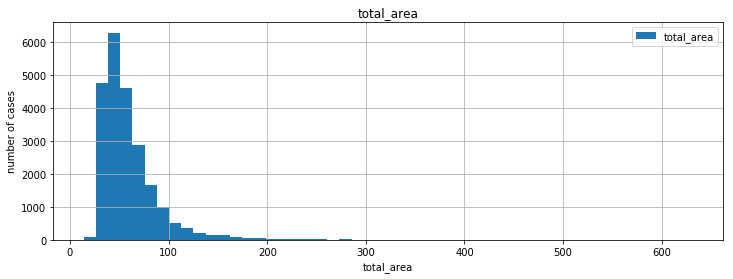

In [47]:
#строим гистограмму для столбца total_area на 50 корзин
data['total_area'].hist(bins=50,legend=True,figsize=(12,4))

plt.title('total_area') 
plt.xlabel('total_area') 
plt.ylabel('number of cases') 

plt.show() 

Выведем описательные статистики переменной общей площади.

In [48]:
display(data['total_area'].describe()) 

count    23070.000000
mean        60.622391
std         34.494083
min         14.000000
25%         40.500000
50%         52.300000
75%         70.000000
max        631.200000
Name: total_area, dtype: float64

Видно, что есть значения больше 300. Посчитаем, сколько таких значений.

In [49]:
print(data['total_area'][data['total_area']>300].count())

52


Всего 53 из 23546, то есть 0,2%. Возможно, это ошибки в данных.
По идее, площадь должна коррелировать с ценой.
Попробуем вывести цену квартиры для площади больше 300 м.кв.

In [50]:
display(data['last_price'][data['total_area']>300])

155       96000000.0
581       65000000.0
660       49950000.0
793      135000000.0
1026     155000000.0
1085      75000000.0
1388      59800000.0
1494      65000000.0
2243     130278280.0
2580      30900000.0
3117     140000000.0
3676      28789000.0
4237      50000000.0
5042      35000000.0
5873      38000000.0
5893     230000000.0
6183      84382000.0
6221      34000000.0
6621      99000000.0
7543     130000000.0
7664      40000000.0
7674     131000000.0
7939      39000000.0
8018      84000000.0
9561      24900000.0
9826      43185328.0
10569     36900000.0
10684     32894076.0
11087     14000000.0
11436     24000000.0
12401     91500000.0
12859    140000000.0
12971    763000000.0
13749    240000000.0
14088     51000000.0
14591     29000000.0
14706    401300000.0
14991     45000000.0
15016    150000000.0
15607     34000000.0
15651    300000000.0
16179     28000000.0
19221     30000000.0
19865    180000000.0
19961     32350000.0
20273     20000000.0
20314     42000000.0
20820     739

Все цены оказались высокими, поэтому эти данные не похожи на ошибочные, не будем удалять.

Для наглядности построим гистограмму для площадей меньше 300 кв.м.

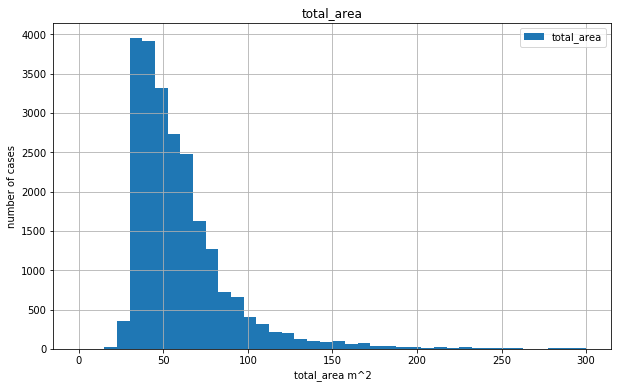

In [51]:
data['total_area'].hist(range=(0,300),bins=40,legend=True,figsize=(10,6))

plt.title('total_area') 
plt.xlabel('total_area m^2') 
plt.ylabel('number of cases') 
  
plt.show() 

Видно, что абсолютное большинство квартир - площадью до 100 кв.м.
Наиболее популярные - небольшие площадью до 50 кв.м.

По жилой площади построим гистограмму.

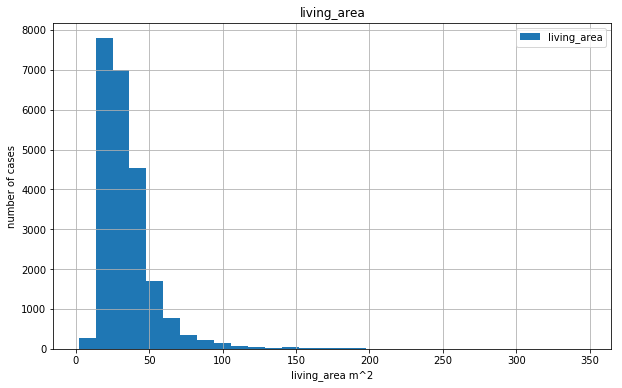

In [52]:
#строим гистограмму для столбца living_area на 30 корзин
data['living_area'].hist(bins=30,legend=True,figsize=(10,6))

plt.title('living_area') 
plt.xlabel('living_area m^2') 
plt.ylabel('number of cases') 
  
plt.show() 

Выведем описательные статистики переменной жилой площади.

In [53]:
display(data['living_area'].describe()) 

count    23070.000000
mean        34.326110
std         21.059426
min          2.000000
25%         18.500000
50%         30.500000
75%         42.800000
max        347.500000
Name: living_area, dtype: float64

Проверим, сколько больших значений в этом столбце (больше 200).

In [54]:
print(data['living_area'][data['living_area']>200].count())

24


Проверим, сколько маленьких значений в этом столбце (меньше 20).

In [55]:
print(data['living_area'][data['living_area']<20].count())

6598


Итого, очень много маленьких квартир, с жилой площадью меньше 20 кв.м., почти 30%.

Строим гистограмму для площади кухни.

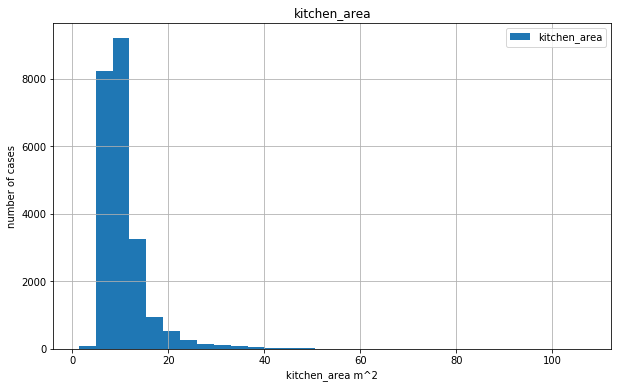

In [56]:
#строим гистограмму для столбца kitchen_area на 30 корзин
data['kitchen_area'].hist(bins=30,legend=True,figsize=(10,6))

plt.title('kitchen_area') 
plt.xlabel('kitchen_area m^2') 
plt.ylabel('number of cases') 
  
plt.show() 

Выведем описательные статистики переменной площади кухни.

In [57]:
display(data['kitchen_area'].describe()) 

count    23070.000000
mean        10.431059
std          5.586060
min          1.300000
25%          7.200000
50%          9.000000
75%         11.500000
max        107.000000
Name: kitchen_area, dtype: float64

Посмотрим, сколько больших кухонь (больше 50 м.кв.)

In [58]:
print(data['kitchen_area'][data['kitchen_area']>50].count())

44


Больших кухонь очень мало, поэтому можно построить гистограмму только по кухням меньше 50 кв.м.

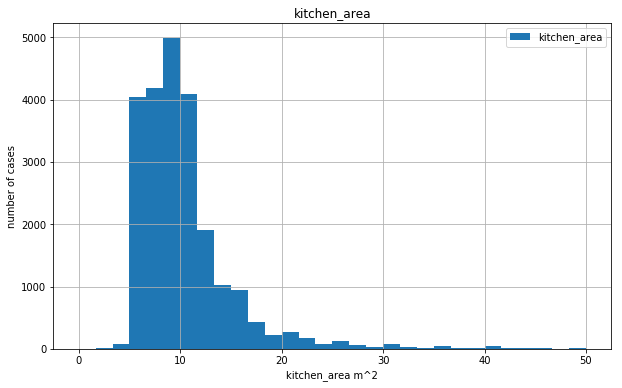

In [59]:
data['kitchen_area'].hist(bins=30,range=(0,50),legend=True,figsize=(10,6))

plt.title('kitchen_area') 
plt.xlabel('kitchen_area m^2') 
plt.ylabel('number of cases') 
  
plt.show() 

На этой гистограмме видно, что чаще всего кухни в квартирах имеют площадь около 10 кв.м.

По цене объекта гистограмма выглядит следующим образом:

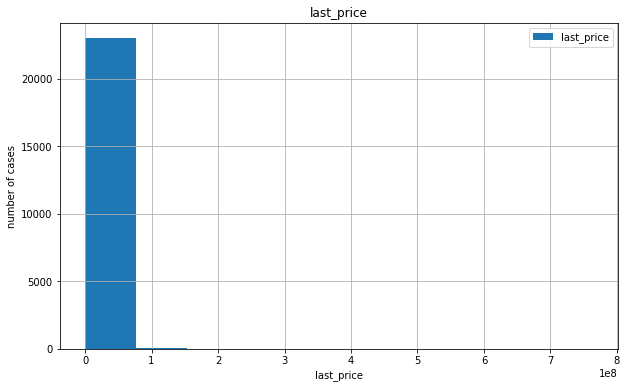

In [60]:
data['last_price'].hist(bins=10,legend=True,figsize=(10,6))

plt.title('last_price') 
plt.xlabel('last_price')
plt.ylabel('number of cases') 
  
plt.show() 

Очевидно, есть объекты с очень большой ценой, которые "портят" гистограмму, поэтому установим границы цены до 35 млн (в этот диапазон попадает 99% записей).

In [61]:
#число записей, в которых цена больше 35 млн, % от всего числа записей 
display(data['last_price'][data['last_price']>35000000].count()/230.70)

1.035977459904638

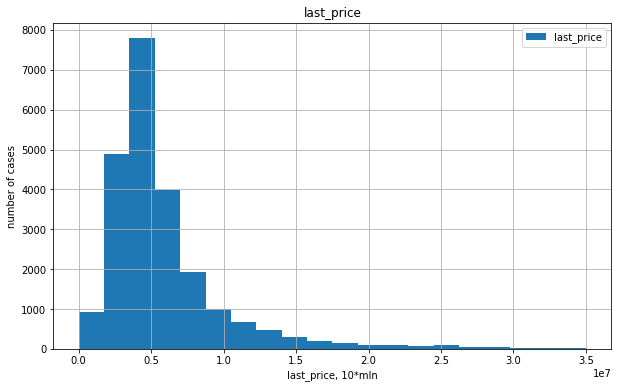

In [62]:
#гистограмма для квартир стоимостью меньше 35 млн
data['last_price'].hist(bins=20,range=(0,35000000),legend=True,figsize=(10,6))
plt.title('last_price') 
plt.xlabel('last_price, 10*mln') 
plt.ylabel('number of cases') 
  
plt.show() 

Большинство квартир имеют стоимость около 5 млн.

Выведем описательные статистики переменной стоимости квартиры.

In [63]:
display(data['last_price'].describe()) 

count    2.307000e+04
mean     6.557095e+06
std      1.058601e+07
min      1.219000e+04
25%      3.480000e+06
50%      4.682500e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

По количеству комнат гистограмма выглядит следующим образом:

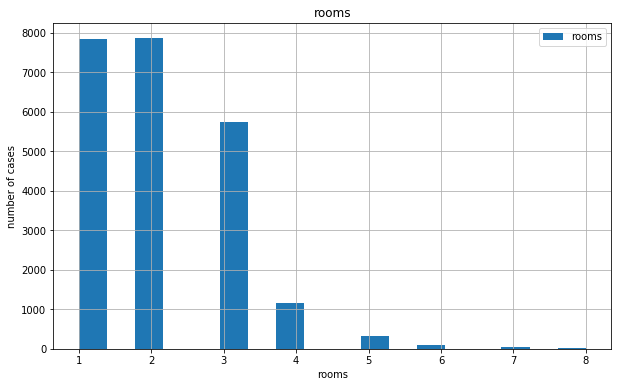

In [64]:
data['rooms'].hist(bins=18,legend=True,figsize=(10,6))

plt.title('rooms') 
plt.xlabel('rooms') 
plt.ylabel('number of cases') 
  
plt.show() 

Как и следовало ожидать, наиболее популярные квартиры - одно- и двухкомнатные, затем трехкомнатные (их меньше, чем однокомнатных на 30%). Четырехкомнатных меньше, чем однокомнатных, почти в 8 раз. Пяти- и вышекомнатные квартиры составляют абсолютное меньшинство - их всего около 2% записей.  

Выведем описательные статистики переменной числа комнат.

In [65]:
display(data['rooms'].describe()) 

count    23070.000000
mean         2.084092
std          1.027661
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

Выведем описательные статистики высоты потолков.

In [66]:
display(data['ceiling_height'].describe()) 

count    23070.000000
mean         2.765934
std          0.959754
min          1.000000
25%          2.600000
50%          2.765934
75%          2.765934
max        100.000000
Name: ceiling_height, dtype: float64

Гистограмма по высоте потолков:

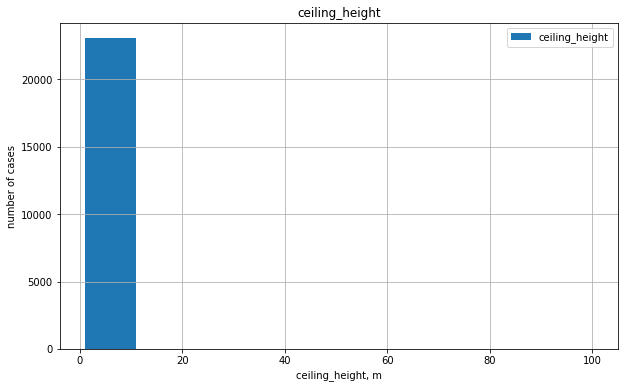

In [67]:
data['ceiling_height'].hist(legend=True,figsize=(10,6))

plt.title('ceiling_height') 
plt.xlabel('ceiling_height, m') 
plt.ylabel('number of cases') 
  
plt.show() 

Очевидно, в данных попались аномальные значения. Построим гистограмму в границах (2,4.5).

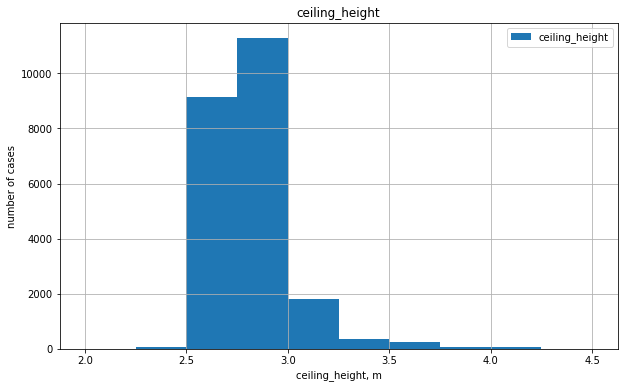

In [68]:
data['ceiling_height'].hist(range=(2,4.5),legend=True,figsize=(10,6))
plt.title('ceiling_height') 
plt.xlabel('ceiling_height, m')
plt.ylabel('number of cases') 
  
plt.show() 

Найдем, сколько значений попали в диапазон больше 4,5 м.

In [69]:
display(data['ceiling_height'][data['ceiling_height']>4.5].count())

38

Выведем эти значения в явном виде.

In [70]:
display(data['ceiling_height'][data['ceiling_height']>4.5])

355       25.00
464        5.20
1026       5.30
1053       5.00
1300       4.70
1388       5.60
2802       4.80
3148      32.00
3474       8.00
4643      25.00
5076      24.00
5246      27.00
5669      26.00
5807      27.00
5863       8.30
6246      25.00
7578       5.50
9379      25.00
10773     27.00
11285     25.00
12401      4.65
12628      5.30
14382     25.00
15061     14.00
15743      8.00
17442      8.00
17496     20.00
17857     27.00
18545     25.00
19142      4.70
20264      6.00
20478     27.00
20507     22.60
21923      4.90
22309     10.30
22336     32.00
22869    100.00
22938     27.00
Name: ceiling_height, dtype: float64

Поскольку абсолютное большинство значений высоты потолка попадает в диапазон от 2 до 4 метров, логично предположить, что значения от 20 до 40 - ошибочно умноженные на 10, поэтому эти данные можно поделить на 10. Остальные (их всего 19 записей) можно удалить без потери важной информации.

In [71]:
#функция, которая делит значения в промежутке [20,40] на 10
def ceiling(x):
    if (20<=x<=40):
        return x/10
    else:
        return x
#применяем эту функцию к столбцу с высотами потолков
data['ceiling_height']=data['ceiling_height'].apply(ceiling)

In [72]:
#удаляем строки, в которых ceiling_height > 4.5
data=data[data['ceiling_height']<4.5]

Построим гистограмму по типу этажа квартиры. 

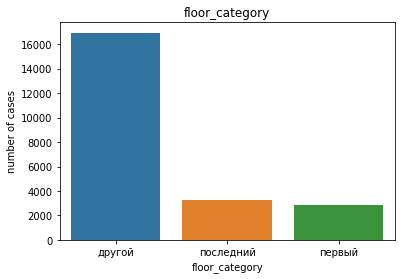

In [73]:
sns.countplot(data=data, x='floor_category',order=data['floor_category'].value_counts(ascending=False).index)

plt.title('floor_category')
plt.ylabel('number of cases')
plt.show()

Видно, что квартир на первом и последнем этаже примерно поровну, в то время как  на других этажах примерно в 5 раз больше, чем на первом или последнем.

Выведем описательные статистики числа этажей в доме.

In [74]:
display(data['floors_total'].describe()) 

count    23045.000000
mean        10.604643
std          6.546414
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         60.000000
Name: floors_total, dtype: float64

Гистограмма по общему числу этажей в доме:

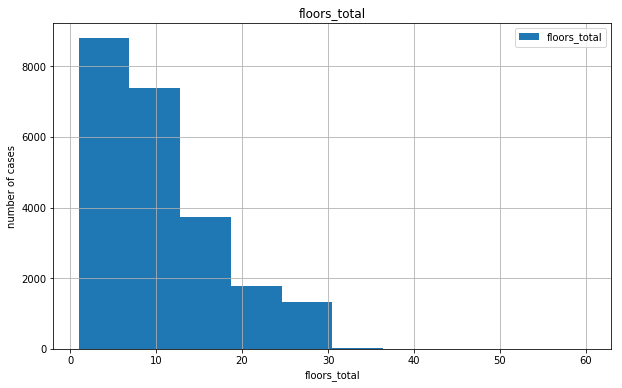

In [75]:
data['floors_total'].hist(legend=True,figsize=(10,6))
plt.title('floors_total') 
plt.xlabel('floors_total')
plt.ylabel('number of cases') 
  
plt.show()

Здесь очевидно тоже есть выбивающиеся значения.
Посмотрим, какие значения принимает столбец с числом этажей.

In [76]:
#выводим уникальные значения столбца floors_total
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

Без точного адреса установить этажность дома невозможно.
Но просмотр по базе cian.ru выявил самый высокий жилой дом в 35 этажей в Санкт-Петербурге.
Посмотрим, сколько записей содержит число этажей больше 35.

In [77]:
display(data['floors_total'][data['floors_total']>35].count())

6

Таких записей оказалось всего 6, их можно удалить без ущерба основной информации.

In [78]:
#удаляем строки, в которых floors_total > 35
data=data[data['floors_total']<36]

Еще раз построим гистограмму для числа этажей.

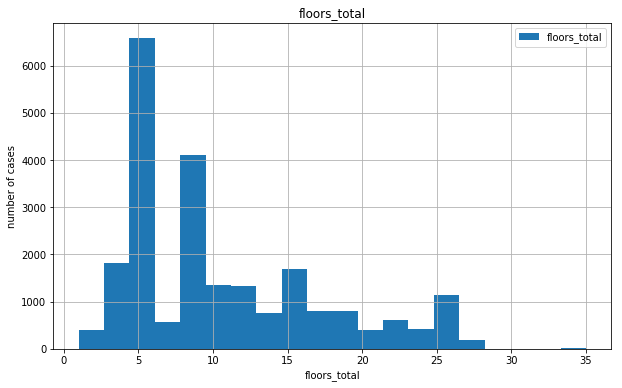

In [79]:
data['floors_total'].hist(bins=20,legend=True,figsize=(10,6))
plt.title('floors_total') 
plt.xlabel('floors_total') 
plt.ylabel('number of cases') 
  
plt.show()

Больше всего предложений среди пятиэтажек, затем девятиэтажек, видимо еще советской постройки.

Расстояние до центра города указано только в 77% строк. Построим по имеющимся данным гистограмму.

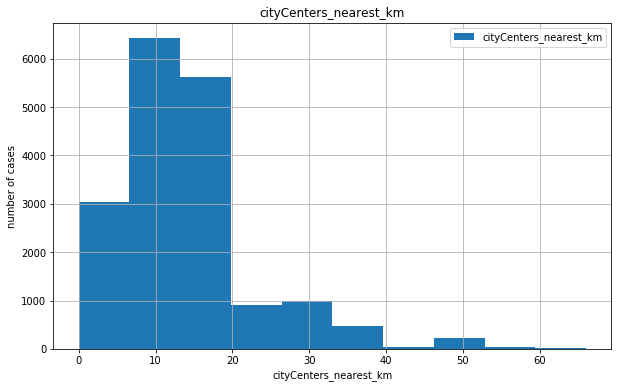

In [80]:
#строим гистограмму по столбцу cityCenters_nearest_km
data['cityCenters_nearest_km'].hist(legend=True,figsize=(10,6))
plt.title('cityCenters_nearest_km') 
plt.xlabel('cityCenters_nearest_km') 
plt.ylabel('number of cases') 
  
plt.show()

Абсолютное большинство квартир, у которых указано расстояние, находятся в пределах 20 км от центра города.
Есть очень большие значения, около 60 км, но они соответствуют действительности, это квартиры в пригородах, поэтому в данном случае удалять данные не будем. 

Выведем описательные статистики расстояния до центра города.

In [81]:
display(data['cityCenters_nearest_km'].describe())

count    17744.000000
mean        14.223061
std          8.663801
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

Расстояние до ближайшего парка указано только в 33% строк, информация по этому параметру явно неполная, но построим гистограмму по тем данным, что есть.

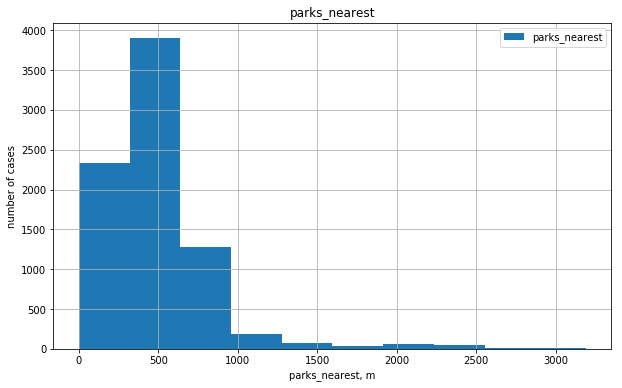

In [82]:
data['parks_nearest'].hist(legend=True,figsize=(10,6))
plt.title('parks_nearest') 
plt.xlabel('parks_nearest, m') 
plt.ylabel('number of cases') 
  
plt.show()

На этой гистограмме расстояние указано в метрах.
Видно, что большинство значений меньше 1000, то есть квартиры расположены рядом с парками.
По всей видимости, только для этих квартир указано расстояние, поэтому так много пропусков в этом столбце.
То есть если парк далеко, нет смысла указывать расстояние до него.

Выведем описательные статистики расстояния до ближайшего парка.

In [83]:
display(data['parks_nearest'].describe())

count    7913.000000
mean      490.405662
std       341.671474
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Таким образом, по результатам построения гистограмм заменены и частично удалены данные в столбце с высотой потолка, а также удалены записи с  числом этажей больше 35, как явно ошибочные.

4.2 Теперь изучим, как быстро продавались квартиры.
Построим гистограмму для столбца с количеством дней от публикации до снятия.

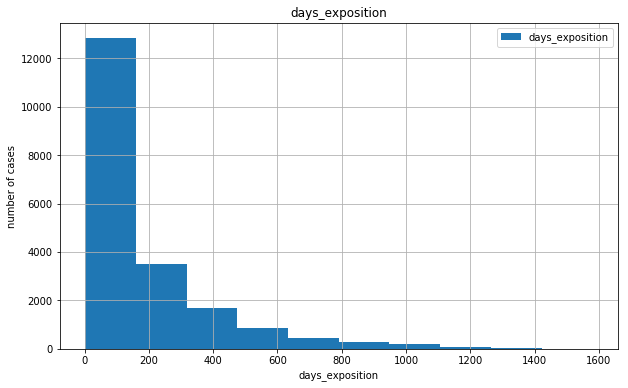

In [84]:
data['days_exposition'].hist(legend=True,figsize=(10,6))
plt.title('days_exposition') 
plt.xlabel('days_exposition') 
plt.ylabel('number of cases') 
  
plt.show()

Выведем основные характеристики переменной.

In [85]:
display(data['days_exposition'].describe()) 

count    19915.000000
mean       181.998494
std        220.468787
min          1.000000
25%         45.000000
50%         97.000000
75%        233.000000
max       1580.000000
Name: days_exposition, dtype: float64

В среднем, квартиры продавались 182 дня, примерно полгода, медиана составила 97 дней, около трех месяцев. 
Видимо, некоторые висели в базе очень долго, по несколько лет (1580 дней максимум), поэтому среднее так сильно отличается от медианы.
Значит, большинство квартир продавалось за три месяца, но часть квартир продавалась очень долго.
Оценим, сколько квартир продавались больше года, полутора, двух, трех лет.

In [86]:
display(data['days_exposition'][data['days_exposition']>365].count()/19940)
display(data['days_exposition'][data['days_exposition']>547].count()/19940)
display(data['days_exposition'][data['days_exposition']>720].count()/19940)
display(data['days_exposition'][data['days_exposition']>1095].count()/19940)

0.15030090270812438

0.07311935807422267

0.038665997993981946

0.008174523570712137

Итого, 15% квартир продавалось больше года, 7% продавались больше полутора лет, 4% квартир продавались дольше двух лет, 1% квартир продавался дольше трех лет.

Таким образом, продажи быстрее трех месяцев можно назвать быстрыми, продажи дольше трех лет можно назвать необычно долгими.

4.3 Теперь изучим факторы, влияющие на стоимость квартир.

Исследуем зависимость цены от общей площади.

Значений площади очень много, поэтому нужно группировать данные и исследовать среднюю цену по группе.

Разобьем все квартиры на категории по общей площади:

0-10 кв.м. - 0 категория

10-20 кв.м. - 1 категория 

20-30 кв.м - 2 категория и т.д.

In [87]:
#создаем столбец категорий по общей площади, категория - это целая часть от деления на 10
data['total_area_category']=data['total_area']//10

Теперь построим график зависимости цены от категории общей площади.

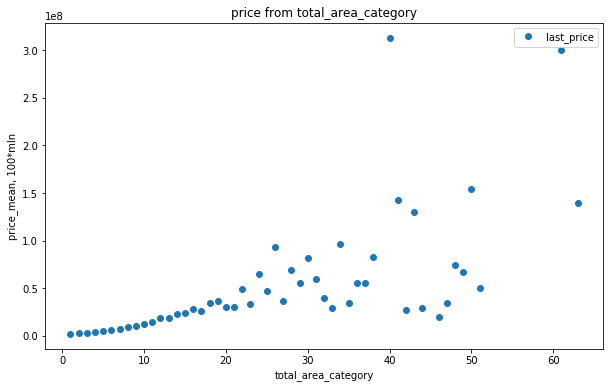

In [88]:
#формируем сводную таблицу по категориям общей площади, считаем среднюю цену квартиры по категориям 
#рисуем график зависимости цены от категории
data.pivot_table(index='total_area_category', values='last_price').plot(style='o',figsize=(10,6),legend=True)

plt.title('price from total_area_category') 
plt.xlabel('total_area_category')
plt.ylabel('price_mean, 100*mln')
  
plt.show()

Из графика видно, что для квартир до категории 20, то есть общей площадью до 200 м.кв. зависимость цены от площади почти линейная. Для больших категорий никакой зависимости цены от площади не наблюдается.

Посмотрим, сколько в базе квартир с площадью больше 200 кв.м.

In [89]:
display(data['total_area'][data['total_area']>200].count())

200

Таких квартир всего 200, то есть меньше 1% от общего числа, поэтому их влиянием можно пренебречь и считать зависимость цены квартиры от площади линейной.

Посчитаем корреляцию общей площади и цены квартиры.

In [90]:
display(data['total_area'].corr(data['last_price']))

0.6381698819023234

0.64 - довольно большой коэффициент, говорящий о наличии линейной взаимосвязи между двумя величинами.

То же самое можно проделать с жилой площадью, разбить все данные на категории, как в случае с общей площадью.

In [91]:
#создаем столбец категорий по жилой площади, категория - это целая часть от деления на 10
data['living_area_category']=data['living_area']//10

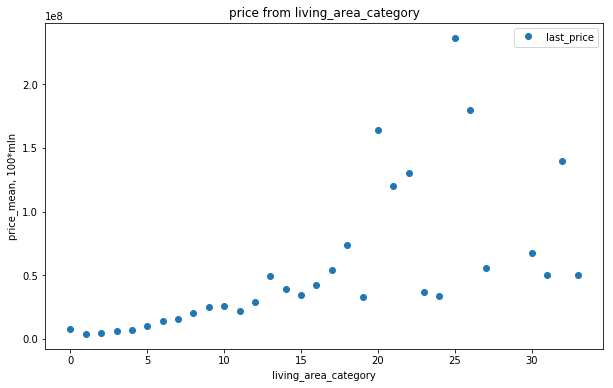

In [92]:
#формируем сводную таблицу по категориям жилой площади, считаем среднюю цену квартиры по категориям 
#рисуем график зависимости цены от категории
data.pivot_table(index='living_area_category', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from living_area_category') 
plt.xlabel('living_area_category')
plt.ylabel('price_mean, 100*mln')
  
plt.show()

На этом графике тоже прослеживается линейная зависимость цены от жилой площади, по крайней мере для квартир с жилой площадью до 170 кв.м. 

Посчитаем число квартир с жилой площадью больше 170 м.

In [93]:
display(data['living_area'][data['living_area']>170].count())

57

Таких квартир всего 57, поэтому их влиянием можно пренебречь. Считаем зависимость цены от жилой площади линейной.

Посчитаем корреляцию жилой площади и цены квартиры.

In [94]:
display(data['living_area'].corr(data['last_price']))

0.5403495648957498

0.54 - не очень большой коэффициент, но про линейную связь двух величин говорить можно.

Площадь кухни обычно сильно меньше общей, поэтому разобьем данные на более мелкие категории:

0-5 м,

5-10 м  и т.д.

In [95]:
#создаем столбец категорий по площади кухни, категория - это целая часть от деления на 5
data['kitchen_area_category']=data['kitchen_area']//5

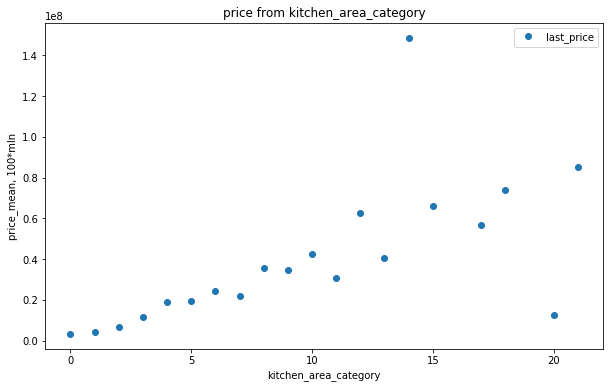

In [96]:
#формируем сводную таблицу по категориям площади кухни, считаем среднюю цену квартиры по категориям 
#рисуем график зависимости цены от категории
data.pivot_table(index='kitchen_area_category', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from kitchen_area_category') 
plt.xlabel('kitchen_area_category')
plt.ylabel('price_mean, 100*mln')
  
plt.show()

На графике зависимость тоже выглядит линейной, как и в случае с общей и жилой площадью, за исключением пары выбивающихся значений (14 и 20 категории). Но поскольку в категориях выше 13 находится всего 12 записей, эти выбросы не меняют характер исходной линейной зависимости.

In [97]:
#число записей в категориях выше 13
display(data['kitchen_area'][data['kitchen_area']>13*5].count())

12

Посчитаем корреляцию площади кухни и цены квартиры.

In [98]:
display(data['kitchen_area'].corr(data['last_price']))

0.43491602224380066

0.43 - небольшой коэффициент, говорит о несильной линейной связи между величинами.

По числу комнат категорий создавать не нужно, достаточно посчитать среднюю цену квартиры для каждого числа комнат и построить график.

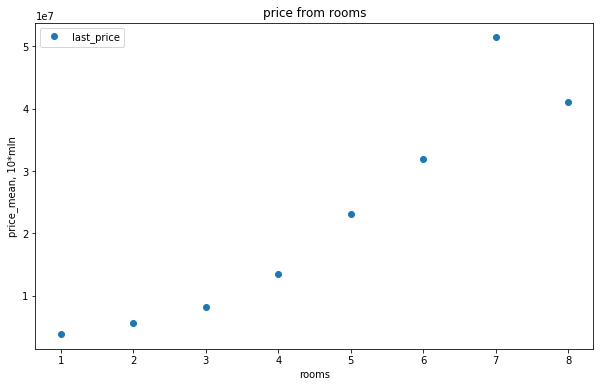

In [99]:
#формируем сводную таблицу по количеству комнат, считаем среднюю цену квартиры по каждому числу комнат
#рисуем график зависимости цены от количества комнат
data.pivot_table(index='rooms', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from rooms') 
plt.xlabel('rooms')
plt.ylabel('price_mean, 10*mln')
  
plt.show()

Как и следовало ожидать, с количеством комнат цена квартир увеличивается. Однако зависимость не выглядит линейной,  больше похожа на степенную функцию. 8-комнатные квартиры выбиваются из общей картины, но их количество снова невелико.

In [100]:
#число 8-комнатных квартир
display(data['rooms'][data['rooms']==8].count())

11

Посчитаем корреляцию числа комнат и цены квартиры.

In [101]:
display(data['rooms'].corr(data['last_price']))

0.3534071641571838

0.35 - небольшое значение, зависимость нелинейная.

Исследуем зависимость стоимости квартиры от категории этажа.  

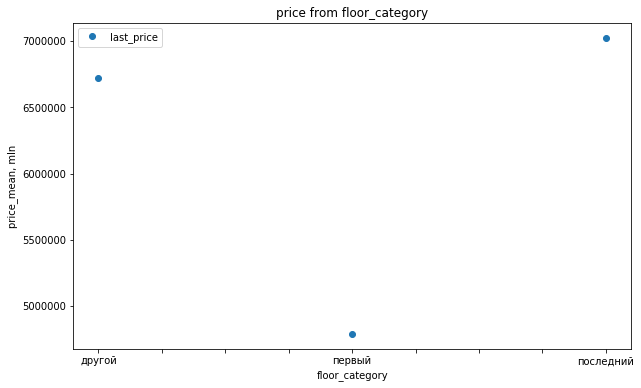

In [102]:
#формируем сводную таблицу по категории этажа, считаем среднюю цену квартиры для каждой категории
#рисуем график зависимости цены от категории этажа
data.pivot_table(index='floor_category', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from floor_category') 
plt.xlabel('floor_category')
plt.ylabel('price_mean, mln')
  
plt.show()

Квартиры на первом этаже почти в полтора раза дешевле квртир на других этажах. Интересно, что квартиры на последних этажах оказались дороже остальных. Видимо, это квартиры в новостройках, в которых не заливает крышу, или дорогие пентхаусы.

Посмотрим, сколько всего квартир на последнем этаже.

In [103]:
display(data['floor_category'][data['floor_category']=='последний'].count()/230.70)

14.130905938448201

Больше 14%, довольно много,  поэтому это не случайное отклонение. Квартиры на последнем этаже оказались самыми дорогими.

Посмотрим, как зависит цена от дня недели, в который было размещено объявление. 

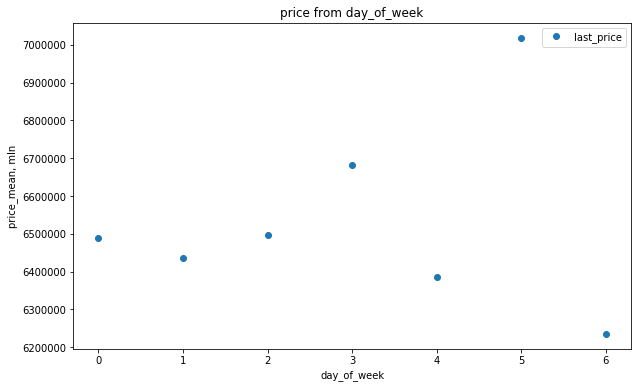

In [104]:
#формируем сводную таблицу по дню недели, считаем среднюю цену квартиры для каждого дня
#рисуем график зависимости цены от дня недели
data.pivot_table(index='day_of_week', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from day_of_week') 
plt.xlabel('day_of_week')
plt.ylabel('price_mean, mln')
  
plt.show()

Явной зависимости на этом графике не прослеживается. 

Можно посмотреть, сколько объявлений размещалось в разные дни.

In [105]:
data.pivot_table(index='day_of_week', values='last_price',aggfunc='count')

,last_price
day_of_week,
0,3525
1,4055
2,3866
3,4176
4,3893
5,1884
6,1640


Видно, что основная масса объявлений выкладывалась в будние дни, в выходные публиковалось в среднем в два раза меньше объявлений, чем в любой будний день. Возможно, поэтому такой размах в цене на выходных - там меньше данных, поэтому выбросы сильнее смещают среднее значение цены.

Посчитаем корреляцию дня размещения и цены квартиры.

In [106]:
display(data['day_of_week'].corr(data['last_price']))

0.002573589191553992

Очень маленький коэффициент, связи между величинами нет.

Построим график зависимости цены от месяца размещения.

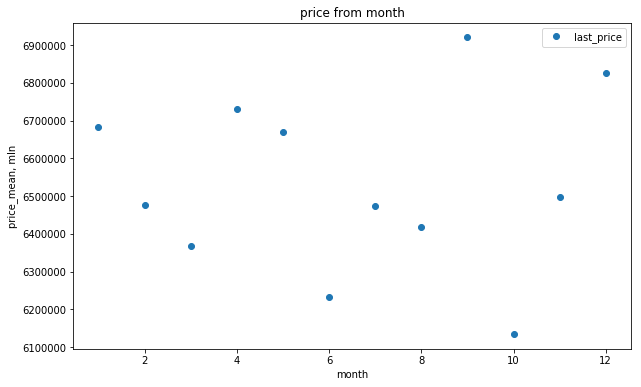

In [107]:
#формируем сводную таблицу по месяцу, считаем среднюю цену квартиры для каждого месяца
#рисуем график зависимости цены от дня недели
data.pivot_table(index='month', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from month') 
plt.xlabel('month')
plt.ylabel('price_mean, mln')
  
plt.show()

Здесь тоже не видно никакой зависимости.

Можно посчитать коэффициент корреляции месяца и цены квартиры.

In [108]:
display(data['month'].corr(data['last_price']))

0.0007468752065557684

С таким коэффициентом корреляции ни о какой зависимости говорить не приходится.

Построим график зависимости цены квартиры от года размещения объявления.

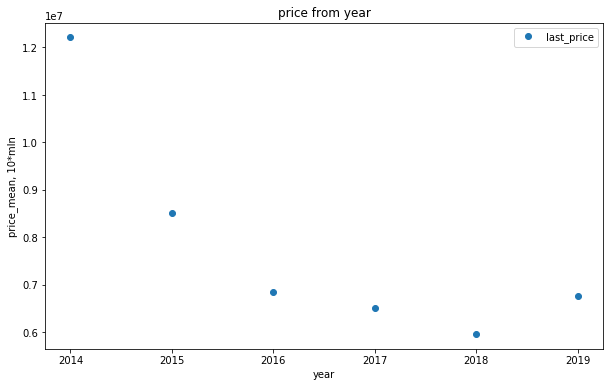

In [109]:
data.pivot_table(index='year', values='last_price').plot(style='o',figsize=(10,6),legend=True)
plt.title('price from year') 
plt.xlabel('year')
plt.ylabel('price_mean, 10*mln')
  
plt.show()

Посчитаем корреляцию года размещения объявления и цены квартиры.

In [110]:
display(data['year'].corr(data['last_price']))

-0.043942462160309385

Коэффициент очень маленький и отрицательный, говорит о небольшой обратной связи между переменными, но она явно не линейная.

Таким образом, влияют на стоимость квартиры общая, жилая площадь, площадь кухни, количество комнат, этаж и год размещения объявления. День и месяц размещения на цену квартиры не влияют.

По графику видно, что с 2014 года средняя стоимость квартиры уменьшалась, и только в 2019 году обозначился небольшой рост стоимости.

4.4 Посчитаем среднюю цену за кв.м. в 10 населенных пунктах с наибольшим числом объявлений.

In [111]:
#Создаем сводную таблицу, группируем по названию нас.пункта, выводим число записей и среднее по цене за кв.м.
#сортируем по числу записей
data_average=data.pivot_table(index='locality_name', values='price_meter',aggfunc={'count','mean'}).sort_values(by='count', ascending=False)
#для удобства отображения меняем тип средней цены на целочисленный
data_average['mean']=data_average['mean'].astype('int',errors='raise')
#меняем названия столбцов
data_average=data_average.rename(columns={'count':'Число записей','mean':'Средняя цена за кв.м.'})
display(data_average.head(10))

,Число записей,Средняя цена за кв.м.
locality_name,,
Санкт-Петербург,15345,114538
поселок Мурино,500,84665
поселок Шушары,430,78017
Всеволожск,385,68668
Пушкин,369,103125
Колпино,335,75396
поселок Парголово,321,90293
Гатчина,302,68699
деревня Кудрово,267,91987


Самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге и в Пушкине, самая низкая стоимость - в Выборге.

4.5 Исследуем зависимость стоимости квартиры в Санкт-Петербурге в зависимости от растояния до центра.

Построим сводную таблицу, чтобы вывести количество квартир и среднюю цену в зависимости от расстояния от центра (км).

In [112]:
#строим сводную таблицу по расстоянию до центра, выводим кол-во записей и среднюю цену для каждой категории 
data_peter=data[data['locality_name'] == 'Санкт-Петербург']\
.pivot_table(index='cityCenters_nearest_km',values='last_price',aggfunc={'mean','count'})
#меняем тип данных на целочисленный для удобства отображения
data_peter['mean']=data_peter['mean'].astype('int',errors='raise')
#переименовываем столбцы для удобства
data_peter=data_peter.rename(columns={'mean':'Средняя цена','count':'Всего квартир'})
display(data_peter)

,Всего квартир,Средняя цена
cityCenters_nearest_km,,
0.0,27,31449115
1.0,187,20902675
2.0,301,18011528
3.0,342,10978606
4.0,673,13208740
5.0,897,14265852
6.0,604,14799691
7.0,414,14622495
8.0,581,9305881


Построим график зависимости стоимости квартиры от расстояния до центра.

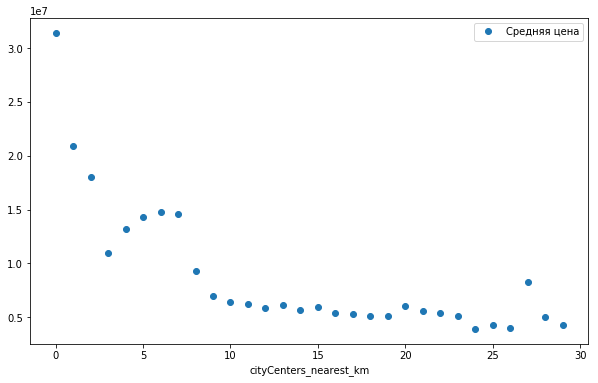

In [113]:
data_peter['Средняя цена'].plot(style='o',figsize=(10,6),legend=True)

Удивительно выбиваются из графика квартиры с расстоянием 4-7 км до центра. Возможно, это квартиры в очень престижном районе города или дорогой новостройке, большие по площади. Без точной информации по адресам более детальный анализ провести невозможно.

Также выбивается из графика значение 27 км до центра, но таких всего две квартиры, поэтому их можно не принимать во внимание.

В целом, зависимость выглядит вполне адекватно: чем ближе к центру, тем стоимость квартиры больше.

### Вывод

Проведен  исследовательский анализ данных по продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет,  установлены параметры, влияющие на цену объектов. 

1. Проведена Предобработка данных

1.1	Работа с пропусками

Строки с пропусками в названии населенного пункта и количестве этажей в доме удалены. Также удалены строки с числом комнат больше 9 как сомнительные.

Пропуски в столбцах с жилой площадью и площадью кухни  заменены  на медианные в зависимости от числа комнат. 

Данные, в которых общая площадь оказалась меньше суммы жилой площади и кухни, удалены как явно ошибочные.

Пропуски в  столбце с высотой потолков заменены средним значением, в столбце с числом балконов -  нулем.

Пропуски в столбце «апартаменты» , а также «число дней от публикации до снятия объявления» оставлены нетронутыми. 

Для пригородов Санкт-Петербурга  расстояние до аэропорта и до центра  заменено на среднее по расстоянию в одном городе/ поселке.

Для Санкт-Петербурга эти пропуски оставлены как есть.

В столбцах, связанных с расстоянием до парков и прудов, пропуски также остались нетронутыми.


1.2	Изменение типа данных.

Дату публикации  сохранена в формате даты и времени.

Вещественный тип данных в «числе этажей» заменен на целочисленный.

1.3	Обработка дубликатов

Явных дубликатов в датафрейме  не оказалось.

Неявные дубликаты в названиях населенных пунктов устранены:
во всех названиях буква «ё» заменена на «е»,  и «поселок городского типа Рябово» заменен на «поселок Рябово».

1.4  Новые столбцы

В таблицу для упрощения анализа данных добавлены столбцы  с ценой за квадратный метр, днем  недели, месяцем и годом публикации объявления, типом этажа квартиры  (первый, последний, другой), а так же расстояние до центра города в км.

2.  Исследовательский анализ данных

Из построенных гистограмм можно сделать следующие выводы:
* 	абсолютное большинство квартир - площадью до 100 кв.м. Наиболее популярные - небольшие площадью до 50 кв.м.
* 	очень много квартир с маленькой жилой площадью (меньше 20 кв.м.), почти 30%.
* 	чаще всего кухни в квартирах имеют площадь около 10 кв.м.
* 	большинство квартир имеют стоимость около 5 млн.
* 	наиболее популярные квартиры - одно- и двухкомнатные, затем трехкомнатные 
* 	в большинстве квартир высота потолка от 2 до 4 метров
* 	квартир на первом и последнем этаже примерно поровну, в то время как на других этажах примерно в 5 раз больше, чем на первом или последнем
* 	больше всего предложений среди пятиэтажек, затем девятиэтажек
* 	большинство квартир, у которых указано расстояние, находятся в пределах 20 км от центра города
* 	большинство квартир, у которых указано расстояние до парка, находятся в пределах 1 км до него, но таких квартир всего треть от общего числа.

По результатам анализа гистограмм заменены данные в столбце с высотой потолка: значения от 20 до 40  поделены на 10, затем строки со значением высоты потолка больше 4,5 м удалены как ошибочные.

Также удалены записи с  числом этажей больше 35.

3. Длительность продажи квартир

 Большинство квартир продавалось за три месяца, но часть квартир продавалась очень долго: 1% квартир продавался дольше трех лет.
Поэтому продажи быстрее трех месяцев можно назвать быстрыми, продажи дольше трех лет можно назвать необычно долгими.

4. Факторы, влияющие на стоимость квартир

По результатам анализа выявлена прямая линейная  зависимость стоимости квартиры от общей  и жилой площади. 

Аналогично с  площадью кухни:  чем больше кухня – тем выше цена квартиры .

Стоимость квартиры с количеством комнат увеличивается, однако зависимость не выглядит линейной.

Квартиры на первом этаже почти в полтора раза дешевле квартир на других этажах. Квартиры на последних этажах оказались дороже остальных. 

Зависимости стоимости квартиры от дня и месяца размещения объявления не выявлено, но по годам прослеживается явная тенденция.
С 2014 года средняя стоимость квартиры уменьшалась, и только в 2019 году обозначился небольшой рост.

5. Средняя цена за кв.м. в 10 населенных пунктах с наибольшим числом объявлений.

Самая высокая стоимость квадратного метра оказалась в Санкт-Петербурге и в Пушкине, самая низкая стоимость - в Выборге.

6. Зависимость стоимости квартиры в Санкт-Петербурге от растояния до центра.

Вполне логично выявлена зависимость: чем ближе к центру, тем стоимость квартиры больше.
Но из общей последовательности выбиваются значения 4-7 км до центра: квартиры с таким расстоянием до центра стоят больше ожидаемого. По всей видимости, это квартиры в очень престижном районе или современной новостройке. 

Таким образом, главными параметрами, влияющими на стоимость объекта, оказались:


* 	общая площадь;ать для 
* 	жилая площадь;
* 	площадь кухни;
* 	количество комнат;
* 	тип этажа квартиры («первый», «последний», «другой»);
* 	расстояние до центра города.

По площади (и общей, и жилой, и кухни) и количеству комнат зависимость оказалась прямая, 

по расстоянию от центра города - обратная, 

по типу этажа: первый этаж самый дешевый, последний - самый дорогой.

Полученные выводы можно использовпостроения автоматизированной системы по поиску аномальных объявлений с целью пресечения мошеннической деятельности.


